In [1]:
import tensorflow as tf

/Users/mzielinski/anaconda3/envs/keras/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/mzielinski/anaconda3/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.InteractiveSession()

### Building your first TensorFlow graph

![graph](img/graph.PNG)

At the core of every TensorFlow program is the computation graph described in code with the TensorFlow API.

* **Nodes**, typically drawn as circles, ovals, or boxes, represent some sort of computation or action being done on or with data in the graph’s context. Any computation node in the graph is called an `Operation`, or `Op` for short. `Ops` take in zero or more `Tensor` objects as input and output zero or more `Tensor` objects. To create an `Operation`, you call its associated `Python` constructor - in this case, `tf.constant()` creates a “constant”

* **Edges** are the actual values that get passed to Operations

In [128]:
tf.reset_default_graph()
a = tf.constant(5, name="input_a")
b = tf.constant(3, name="input_b")
c = tf.multiply(a,b, name="mul_c")
d = tf.add(a,b, name="add_d")
e = tf.add(c,d, name="add_e")

In [130]:
sess1 = tf.Session()
writer = tf.summary.FileWriter('/tmp/tftemp1/', sess1.graph) 
sess1.run(e)

23

### TensorFlow Graphs
Any computation in TensorFlow is represented as an instance of a `tf.Graph` object. Such a graph consists of a set of instances of `tf.Tensor` objects and `tf.Operation` objects.

Creating a Graph is simple - it's constructor doesn’t take any variables:

In [131]:
g = tf.Graph()

Once we have our `Graph` initialized, we can add `Operations` to it by using the `Graph.as_default()` method to access its context manager. In conjunction with the with statement, we can use the context manager to let TensorFlow know that we want to add Operations to a specific `Graph`:

In [ ]:
with g.as_default():
    # Create Operations as usual; they will be added to graph `g`
    a = tf.mul(2, 3)

As a convenience, TensorFlow automatically creates a `Graph` when the library is loaded and assigns it to be the default. Thus, any `Operations`, `Tensors`, etc. defined outside of a `Graph.as_default()` context manager will automatically be placed in the default graph:

In [134]:
# Placed in the default graph
in_default_graph = tf.add(1,2)

# Placed in graph `g`
with g.as_default():
    in_graph_g = tf.multiply(2,3)

# We are no longer in the `with` block, so this is placed in the default graph
also_in_default_graph = tf.subtract(5,1)

If you’d like to get a handle to the default graph, use the tf.get_default_graph() function:

In [135]:
default_graph = tf.get_default_graph()

### TensorFlow Sessions

Sessions, as discussed in the previous exercise, are responsible for graph execution.`tf.Session()` object stores the context under which a computation is performed. The constructor `tf.Session` takes in three optional parameters:

* **target** specifies the execution engine to use. For most applications, this will be left at its default empty string value. When using sessions in a distributed setting, this parameter is used to connect to tf.train.Server instances (covered in the later chapters of this book).

* **graph** specifies the Graph object that will be launched in the Session. The default value is None, which indicates that the current default graph should be used. When using multiple graphs, it’s best to explicitly pass in the Graph you’d like to run (instead of creating the Session inside of a with block).

* **config** allows users to specify options to configure the session, such as limiting the number of CPUs or GPUs to use, setting optimization parameters for graphs, and logging options.


In [137]:
sess = tf.Session(graph=tf.get_default_graph()) #identical to sess = tf.Session()
a = tf.ones((2, 2))
b = tf.matmul(a, a)
sess.run(b)

array([[2., 2.],
       [2., 2.]], dtype=float32)

`Session.run()` takes in one required parameter, `fetches`, as well as optional parameter `feed_dict`.

### Fetches

`fetches` accepts any graph element (either an `Operation` or `Tensor` object), which specifies what the user would like to execute. If the requested object is a `Tensor`, then the output of run() will be a NumPy array. If the object is an `Operation`, then the output will be None.

In [138]:
sess.run([a, b])  # returns [7, 21]

[array([[1., 1.],
        [1., 1.]], dtype=float32), array([[2., 2.],
        [2., 2.]], dtype=float32)]

In addition using `fetches` to get `Tensor` outputs, you’ll also see examples where we give fetches a direct handle to an `Operation` which a useful side-effect when run. An example of this is `tf.global_variables_initializer()`, which prepares all TensorFlow `Variable` objects to be used 

In [139]:
sess.run(tf.global_variables_initializer())

### Feed dictionary

The parameter `feed_dict` is used to override `Tensor` values in the graph, and it expects a Python dictionary object as input. The keys in the dictionary are handles to `Tensor` objects that should be overridden, while the values can be numbers, strings, lists, or NumPy arrays. The values must be of the same type (or able to be converted to the same type) as the `Tensor` key.

In [141]:
# Create Operations, Tensors, etc (using the default graph)
a = tf.add(2, 5)
b = tf.multiply(a, 3)

# Start up a `Session` using the default graph
sess = tf.Session()

# Define a dictionary that says to replace the value of `a` with 15
replace_dict = {a: 15}

# Run the session, passing in `replace_dict` as the value to `feed_dict`
sess.run(b, feed_dict=replace_dict)  # returns 45

45

In [142]:
sess.close()

### Placeholders
A placeholder is a way to input information into a TensorFlow computation graph. Think of placeholders as the input nodes through which information enters TensorFlow. The key function used to create placeholders is `tf.placeholder` `Operation`.

`tf.placeholder` takes in a required parameter `dtype`, as well as the optional parameter `shape`:

* **dtype** specifies the data type of values that will be passed into the placeholder. This is required, as it is needed to ensure that there will be no type mismatch errors.

* **shape** specifies what shape the fed Tensor will be. The default value of shape is `None`, which means a Tensor of any shape will be accepted.

Like any `Operation`, you can also specify a `name` identifier to tf.placeholder.

In [143]:
a = tf.placeholder(tf.float32, shape=(1,), name="input_a")
b = tf.placeholder(tf.float32, shape=(1,), name="input_b")
c = a + b

In [16]:
with tf.Session() as sess:
    c_eval = sess.run(c, {a: [1.], b: [2.]})
    print(c_eval)

[3.]


### Initializing Constant Tensors

In [3]:
tf.zeros(2)

<tf.Tensor 'zeros:0' shape=(2,) dtype=float32>

In [4]:
a = tf.zeros(2)
a.eval()

array([0., 0.], dtype=float32)

In [5]:
b = tf.fill((2, 2), value=5.)
b.eval()

array([[5., 5.],
       [5., 5.]], dtype=float32)

In [8]:
a = tf.random_normal((2, 2), mean=0, stddev=1)
b = tf.random_uniform((2, 2), minval=-2, maxval=2)
c = tf.matmul(a, b)
c.eval()

array([[ 0.5799069 , -0.23929237],
       [-0.70398176,  0.4032595 ]], dtype=float32)

### Tensor Types
Tensors in `TensorFlow` come in a variety of types such as `tf.float32`, `tf.float64`, `tf.int32`, `tf.int64`. 

In [ ]:
a = tf.ones((2,2), dtype=tf.int32)
b = tf.to_float(a)
b.eval()

### TensorFlow Variables
The `tf.Variable()` class provides a wrapper around tensors that allows for stateful computations. The variable objects serve as holders for mutable tensor values that persist across multiple calls to `Session.run()`.

In [144]:
a = tf.Variable(tf.ones((2, 2)), name="var_a")
a

<tf.Variable 'var_a:0' shape=(2, 2) dtype=float32_ref>

`Variable` objects live in the `Graph` like most other TensorFlow objects, but their state is actually managed by a `Session`. Because of this, `Variables` have an extra step involved in order to use them - you must initialize the `Variable` within a `Session`. This causes the `Session` to start keeping track of the ongoing value of the `Variable`. This is typically done by passing in the `tf.global_variables_initializer` `Operation` to `Session.run()`:


In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
a.eval(session=sess)

array([[1., 1.],
       [1., 1.]], dtype=float32)

If you’d only like to initialize a subset of `Variables` defined in the graph, you can use `tf.variables_initializer()`, which takes in a list of Variables to be initialized:

In [146]:
var1 = tf.Variable(0, name="initialize_me")
var2 = tf.Variable(1, name="no_initialization")
init = tf.variables_initializer([var1], name="init_var1")
sess = tf.Session()
sess.run(init)

In order to change the value of the Variable, you can use the `Variable.assign()` method, which gives the Variable the new value to be. Note that `Variable.assign()` is an Operation, and must be run in a Session to take effect:

In [147]:
# Create variable with starting value of 1
my_var = tf.Variable(1)

# Create an operation that multiplies the variable by 2 each time it is run
my_var_times_two = my_var.assign(my_var * 2)

# Initialization operation
init = tf.global_variables_initializer()

# Start a session
sess = tf.Session()

# Initialize variable
sess.run(init)

# Multiply variable by two and return it
out = sess.run(my_var_times_two)
print(out)
## OUT: 2

# Multiply again
out = sess.run(my_var_times_two)
print(out)
## OUT: 4

# Multiply again
out = sess.run(my_var_times_two)
print(out)
## OUT: 8

2
4
8


For simple incrementing and decrementing of `Variables`, TensorFlow includes the `Variable.assign_add()`and `Variable.assign_sub()` methods:

In [148]:
# Increment by 1
sess.run(my_var.assign_add(1))

# Decrement by 1
sess.run(my_var.assign_sub(1))

8

Because `Sessions` maintain `Variable` values separately, each `Session` can have its own current value for a `Variable` definined in a graph:

In [156]:
# Create Ops
my_var = tf.Variable(0)
init = tf.global_variables_initializer()

# Start Sessions
sess1 = tf.Session()
sess2 = tf.Session()

# Initialize Variable in sess1, and increment value of my_var in that Session
sess1.run(init)
out = sess1.run(my_var.assign_add(5))
print(out)
## OUT: 5

# Do the same with sess2, but use a different increment value
sess2.run(init)
out = sess2.run(my_var.assign_add(2))
print(out)
## OUT: 2


5
2


Various `Optimizer` in TensorFlow automatically train machine learning models. That means that it will change values of `Variable` objects without explicitly asking to do so. In most cases, this is what you want, but if there are `Variables` in your graph that should only be changed manually and not with an `Optimizer`, you need to set their trainable parameter to `False` when creating them:

In [157]:
not_trainable = tf.Variable(0, trainable=False)

### Name scopes

In complicated TensorFlow programs, there will be many tensors, variables, and placeholders defined throughout the program. `tf.name_scope(name)` provides a simple scoping mechanism for managing these collections of variables.

Name scopes allow you to group `Operations` into larger, named blocks. Then, when you launch your graph with TensorBoard, each name scope will encapsulate its own `Ops`, making the visualization much more digestible. Additionally all computational graph elements created within the scope of a `tf.name_scope(name)` call will have name prepended to their names.

In [162]:
with tf.name_scope("Scope_A"):
    a = tf.add(1, 2, name="A_add")
    b = tf.multiply(a, 3, name="A_mul")

with tf.name_scope("Scope_B"):
    c = tf.add(4, 5, name="B_add")
    d = tf.multiply(c, 6, name="B_mul")

e = tf.add(b, d, name="output")

writer = tf.summary.FileWriter('/tmp/tftemp1/', graph=tf.get_default_graph())
writer.close()

You can also nest name scopes within other name scopes:

In [165]:
graph = tf.Graph()

with graph.as_default():
    in_1 = tf.placeholder(tf.float32, shape=[], name="input_a")
    in_2 = tf.placeholder(tf.float32, shape=[], name="input_b")
    const = tf.constant(3, dtype=tf.float32, name="static_value")

    with tf.name_scope("Transformation"):

        with tf.name_scope("A"):
            A_mul = tf.multiply(in_1, const)
            A_out = tf.subtract(A_mul, in_1)

        with tf.name_scope("B"):
            B_mul = tf.multiply(in_2, const)
            B_out = tf.subtract(B_mul, in_2)

        with tf.name_scope("C"):
            C_div = tf.divide(A_out, B_out)
            C_out = tf.add(C_div, const)

        with tf.name_scope("D"):
            D_div = tf.divide(B_out, A_out)
            D_out = tf.add(D_div, const)

    out = tf.maximum(C_out, D_out)

writer =  tf.summary.FileWriter('/tmp/tftemp1/', graph=graph)
writer.close()

### Example: Putting it all together

![graph2](img/graph2.PNG)

In [168]:
graph = tf.Graph()

with graph.as_default():

    with tf.name_scope("Transformation"):
        # Separate input layer
        with tf.name_scope("input"):
            # Create input placeholder- takes in a Vector
            a = tf.placeholder(tf.float32, shape=[None], name="input_placeholder_a")
        # Separate middle layer
        with tf.name_scope("intermediate_layer"):
            b = tf.reduce_prod(a, name="product_b")
            c = tf.reduce_sum(a, name="sum_c")
        # Separate output layer
        with tf.name_scope("output"):
            output = tf.add(b, c, name="output")

    with tf.name_scope("Variables"):
        # Variable to keep track of how many times the graph has been run
        global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name="global_step")
        # Variable that keeps track of the sum of all output values over time:
        total_output = tf.Variable(0.0, dtype=tf.float32, trainable=False, name="total_output")
        
    with tf.name_scope("Update"):
        # Increments the total_output Variable by the latest output
        update_total = total_output.assign_add(output)
        # Increments the above `global_step` Variable, should be run whenever the graph is run
        increment_step = global_step.assign_add(1)
        
    with tf.name_scope("summaries"):
        avg = tf.div(update_total, tf.cast(increment_step, tf.float32), name="average")
        # Creates summaries for output node
        tf.summary.scalar("output_summary", output)
        tf.summary.scalar("total_summary", update_total)
        tf.summary.scalar("average_summary", avg)
        
    with tf.name_scope("global_ops"):
        # Initialization Op
        init = tf.global_variables_initializer()
        # Merge all summaries into one Operation
        merged_summaries = tf.summary.merge_all()

sess = tf.Session(graph=graph)
writer = tf.summary.FileWriter('/tmp/tftemp1/', graph=graph)

def run_graph(input_tensor):
    feed_dict = {a: input_tensor}
    _, step, summary = sess.run([output, increment_step, merged_summaries],
                                  feed_dict=feed_dict)
    writer.add_summary(summary, global_step=step)

Operations in TensorFlow don't do anything until you run them, or an op that depends on their output. And the summary nodes that we've just created are peripheral to your graph: none of the ops you are currently running depend on them. So, to generate summaries, we need to run all of these summary nodes. Managing them by hand would be tedious, so use `tf.summary.merge_all` to combine them into a single op that generates all the summary data.

In [169]:
sess.run(init)
run_graph([2,8])
run_graph([3,1,3,3])
run_graph([8])
run_graph([1,2,3])
run_graph([11,4])
run_graph([4,1])
run_graph([7,3,1])
run_graph([6,3])
run_graph([0,2])
run_graph([4,5,6])

Write the summaries to disk with the `SummaryWriter.flush()` method:

In [170]:
writer.flush()

In [171]:
writer.close()
sess.close()

### Optimizers
TensorFlow provides a collection of optimization algorithms in the `tf.train` module. These algorithms can be added as nodes to the TensorFlow computation graph. Tensorflow provides e.g. `tf.train.GradientDescentOptimizer`, `tf.train.MomentumOptimizer`, `tf.train.AdagradOptimizer`, `tf.train.AdamOptimizer`, and many more. 

In [20]:
learning_rate = .001
loss = tf.Variable(0.0)
with tf.name_scope("optim"):
  train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

### Example: Linear regression

In [23]:
import numpy as np
np.random.seed(456)
import  tensorflow as tf
tf.set_random_seed(456)
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

%matplotlib inline

Text(0.5,1,'Toy Linear Regression Data, $y = 5x + 2 + N(0, 1)$')

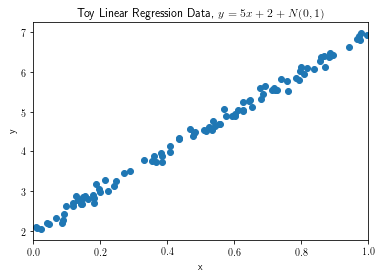

In [175]:
# Generate synthetic data
N = 100
w_true = 5
b_true = 2
noise_scale = .1
x_np = np.random.rand(N, 1)
noise = np.random.normal(scale=noise_scale, size=(N, 1))
# Convert shape of y_np to (N,)
y_np = np.reshape(w_true * x_np  + b_true + noise, (-1))

# Save image of the data distribution
plt.scatter(x_np, y_np)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 1)
plt.title("Toy Linear Regression Data, "
          r"$y = 5x + 2 + N(0, 1)$")

In [178]:
# Generate tensors
with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32, (N, 1), name="x")
    y = tf.placeholder(tf.float32, (N,), name="y")
with tf.name_scope("weights"):
    W = tf.Variable(tf.random_normal((1, 1)))
    b = tf.Variable(tf.random_normal((1,)))
with tf.name_scope("prediction"):
    y_pred = tf.matmul(x, W) + b

# Define training
with tf.name_scope("loss"):
    loss = tf.reduce_sum((y - y_pred)**2)
with tf.name_scope("optim"):
    train_op = tf.train.AdamOptimizer(.001).minimize(loss)

train_writer = tf.summary.FileWriter('/tmp/tftemp1/', tf.get_default_graph())

In [177]:
n_steps = 8000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Train model
    for i in range(n_steps):
        feed_dict = {x: x_np, y: y_np}
        _, out_loss = sess.run([train_op, loss], feed_dict=feed_dict)
        print("step %d, loss: %f" % (i, out_loss))
    
    # Get weights
    w_final, b_final = sess.run([W, b])
    
    # Make Predictions
    y_pred_np = sess.run(y_pred, feed_dict={x: x_np})

step 0, loss: 294584.593750
step 1, loss: 294428.218750
step 2, loss: 294271.750000
step 3, loss: 294115.406250
step 4, loss: 293959.093750
step 5, loss: 293802.687500
step 6, loss: 293646.437500
step 7, loss: 293490.312500
step 8, loss: 293334.187500
step 9, loss: 293177.968750
step 10, loss: 293021.875000
step 11, loss: 292865.812500
step 12, loss: 292710.031250
step 13, loss: 292554.062500
step 14, loss: 292398.187500
step 15, loss: 292242.500000
step 16, loss: 292086.812500
step 17, loss: 291931.125000
step 18, loss: 291775.625000
step 19, loss: 291619.937500
step 20, loss: 291464.437500
step 21, loss: 291309.031250
step 22, loss: 291153.812500
step 23, loss: 290998.500000
step 24, loss: 290843.156250
step 25, loss: 290688.062500
step 26, loss: 290532.937500
step 27, loss: 290378.000000
step 28, loss: 290223.125000
step 29, loss: 290068.000000
step 30, loss: 289913.125000
step 31, loss: 289758.375000
step 32, loss: 289603.687500
step 33, loss: 289448.937500
step 34, loss: 289294.50

step 334, loss: 245888.515625
step 335, loss: 245753.453125
step 336, loss: 245618.484375
step 337, loss: 245483.468750
step 338, loss: 245348.531250
step 339, loss: 245213.609375
step 340, loss: 245078.687500
step 341, loss: 244944.343750
step 342, loss: 244809.562500
step 343, loss: 244675.000000
step 344, loss: 244540.500000
step 345, loss: 244406.062500
step 346, loss: 244271.625000
step 347, loss: 244137.390625
step 348, loss: 244002.906250
step 349, loss: 243868.687500
step 350, loss: 243734.625000
step 351, loss: 243600.437500
step 352, loss: 243466.578125
step 353, loss: 243332.484375
step 354, loss: 243198.625000
step 355, loss: 243064.750000
step 356, loss: 242930.843750
step 357, loss: 242797.203125
step 358, loss: 242663.625000
step 359, loss: 242529.890625
step 360, loss: 242396.515625
step 361, loss: 242262.859375
step 362, loss: 242129.625000
step 363, loss: 241996.218750
step 364, loss: 241862.796875
step 365, loss: 241729.500000
step 366, loss: 241596.515625
step 367, 

step 665, loss: 204419.000000
step 666, loss: 204303.171875
step 667, loss: 204187.437500
step 668, loss: 204071.828125
step 669, loss: 203956.156250
step 670, loss: 203840.640625
step 671, loss: 203725.031250
step 672, loss: 203609.718750
step 673, loss: 203494.093750
step 674, loss: 203378.843750
step 675, loss: 203263.531250
step 676, loss: 203148.156250
step 677, loss: 203033.062500
step 678, loss: 202917.875000
step 679, loss: 202802.781250
step 680, loss: 202687.703125
step 681, loss: 202572.750000
step 682, loss: 202457.812500
step 683, loss: 202342.890625
step 684, loss: 202228.312500
step 685, loss: 202113.515625
step 686, loss: 201998.750000
step 687, loss: 201884.218750
step 688, loss: 201769.531250
step 689, loss: 201654.875000
step 690, loss: 201540.531250
step 691, loss: 201426.062500
step 692, loss: 201311.703125
step 693, loss: 201197.500000
step 694, loss: 201083.125000
step 695, loss: 200968.843750
step 696, loss: 200854.718750
step 697, loss: 200740.562500
step 698, 

step 998, loss: 168786.734375
step 999, loss: 168688.218750
step 1000, loss: 168589.781250
step 1001, loss: 168491.250000
step 1002, loss: 168393.000000
step 1003, loss: 168294.687500
step 1004, loss: 168196.453125
step 1005, loss: 168098.343750
step 1006, loss: 168000.171875
step 1007, loss: 167902.078125
step 1008, loss: 167804.125000
step 1009, loss: 167706.218750
step 1010, loss: 167608.125000
step 1011, loss: 167510.187500
step 1012, loss: 167412.406250
step 1013, loss: 167314.656250
step 1014, loss: 167216.968750
step 1015, loss: 167119.171875
step 1016, loss: 167021.546875
step 1017, loss: 166923.968750
step 1018, loss: 166826.531250
step 1019, loss: 166728.906250
step 1020, loss: 166631.375000
step 1021, loss: 166534.062500
step 1022, loss: 166436.718750
step 1023, loss: 166339.281250
step 1024, loss: 166242.031250
step 1025, loss: 166144.968750
step 1026, loss: 166047.703125
step 1027, loss: 165950.625000
step 1028, loss: 165853.453125
step 1029, loss: 165756.531250
step 1030,

step 1326, loss: 139027.015625
step 1327, loss: 138943.796875
step 1328, loss: 138860.562500
step 1329, loss: 138777.406250
step 1330, loss: 138694.359375
step 1331, loss: 138611.296875
step 1332, loss: 138528.281250
step 1333, loss: 138445.593750
step 1334, loss: 138362.593750
step 1335, loss: 138279.656250
step 1336, loss: 138196.890625
step 1337, loss: 138114.078125
step 1338, loss: 138031.296875
step 1339, loss: 137948.593750
step 1340, loss: 137866.000000
step 1341, loss: 137783.359375
step 1342, loss: 137700.828125
step 1343, loss: 137618.359375
step 1344, loss: 137535.906250
step 1345, loss: 137453.468750
step 1346, loss: 137371.031250
step 1347, loss: 137288.750000
step 1348, loss: 137206.437500
step 1349, loss: 137124.156250
step 1350, loss: 137041.968750
step 1351, loss: 136959.921875
step 1352, loss: 136877.656250
step 1353, loss: 136795.625000
step 1354, loss: 136713.609375
step 1355, loss: 136631.593750
step 1356, loss: 136549.703125
step 1357, loss: 136467.843750
step 135

step 1611, loss: 117037.734375
step 1612, loss: 116966.515625
step 1613, loss: 116895.250000
step 1614, loss: 116824.078125
step 1615, loss: 116752.992188
step 1616, loss: 116681.906250
step 1617, loss: 116610.820312
step 1618, loss: 116539.914062
step 1619, loss: 116468.937500
step 1620, loss: 116397.976562
step 1621, loss: 116327.125000
step 1622, loss: 116256.328125
step 1623, loss: 116185.515625
step 1624, loss: 116114.765625
step 1625, loss: 116044.007812
step 1626, loss: 115973.234375
step 1627, loss: 115902.671875
step 1628, loss: 115831.953125
step 1629, loss: 115761.421875
step 1630, loss: 115690.937500
step 1631, loss: 115620.476562
step 1632, loss: 115550.031250
step 1633, loss: 115479.601562
step 1634, loss: 115409.187500
step 1635, loss: 115338.937500
step 1636, loss: 115268.585938
step 1637, loss: 115198.414062
step 1638, loss: 115128.171875
step 1639, loss: 115058.000000
step 1640, loss: 114987.890625
step 1641, loss: 114917.742188
step 1642, loss: 114847.718750
step 164

step 1893, loss: 98482.468750
step 1894, loss: 98422.015625
step 1895, loss: 98361.578125
step 1896, loss: 98301.179688
step 1897, loss: 98240.796875
step 1898, loss: 98180.453125
step 1899, loss: 98120.218750
step 1900, loss: 98059.882812
step 1901, loss: 97999.625000
step 1902, loss: 97939.468750
step 1903, loss: 97879.328125
step 1904, loss: 97819.117188
step 1905, loss: 97759.054688
step 1906, loss: 97699.039062
step 1907, loss: 97639.031250
step 1908, loss: 97579.046875
step 1909, loss: 97519.085938
step 1910, loss: 97459.226562
step 1911, loss: 97399.304688
step 1912, loss: 97339.468750
step 1913, loss: 97279.671875
step 1914, loss: 97219.882812
step 1915, loss: 97160.156250
step 1916, loss: 97100.570312
step 1917, loss: 97040.835938
step 1918, loss: 96981.226562
step 1919, loss: 96921.593750
step 1920, loss: 96862.031250
step 1921, loss: 96802.585938
step 1922, loss: 96743.171875
step 1923, loss: 96683.601562
step 1924, loss: 96624.304688
step 1925, loss: 96564.984375
step 1926,

step 2296, loss: 76912.437500
step 2297, loss: 76865.515625
step 2298, loss: 76818.750000
step 2299, loss: 76771.882812
step 2300, loss: 76725.132812
step 2301, loss: 76678.429688
step 2302, loss: 76631.718750
step 2303, loss: 76585.062500
step 2304, loss: 76538.421875
step 2305, loss: 76491.859375
step 2306, loss: 76445.281250
step 2307, loss: 76398.703125
step 2308, loss: 76352.171875
step 2309, loss: 76305.718750
step 2310, loss: 76259.203125
step 2311, loss: 76212.851562
step 2312, loss: 76166.468750
step 2313, loss: 76120.125000
step 2314, loss: 76073.734375
step 2315, loss: 76027.500000
step 2316, loss: 75981.218750
step 2317, loss: 75934.968750
step 2318, loss: 75888.796875
step 2319, loss: 75842.656250
step 2320, loss: 75796.531250
step 2321, loss: 75750.460938
step 2322, loss: 75704.343750
step 2323, loss: 75658.234375
step 2324, loss: 75612.265625
step 2325, loss: 75566.296875
step 2326, loss: 75520.281250
step 2327, loss: 75474.406250
step 2328, loss: 75428.500000
step 2329,

step 2693, loss: 60656.792969
step 2694, loss: 60621.449219
step 2695, loss: 60586.136719
step 2696, loss: 60550.980469
step 2697, loss: 60515.675781
step 2698, loss: 60480.492188
step 2699, loss: 60445.289062
step 2700, loss: 60410.156250
step 2701, loss: 60375.070312
step 2702, loss: 60339.925781
step 2703, loss: 60304.886719
step 2704, loss: 60269.789062
step 2705, loss: 60234.812500
step 2706, loss: 60199.824219
step 2707, loss: 60164.847656
step 2708, loss: 60129.925781
step 2709, loss: 60094.984375
step 2710, loss: 60060.105469
step 2711, loss: 60025.210938
step 2712, loss: 59990.421875
step 2713, loss: 59955.605469
step 2714, loss: 59920.867188
step 2715, loss: 59886.082031
step 2716, loss: 59851.351562
step 2717, loss: 59816.664062
step 2718, loss: 59781.960938
step 2719, loss: 59747.363281
step 2720, loss: 59712.734375
step 2721, loss: 59678.113281
step 2722, loss: 59643.554688
step 2723, loss: 59609.031250
step 2724, loss: 59574.550781
step 2725, loss: 59540.015625
step 2726,

step 3097, loss: 48446.867188
step 3098, loss: 48421.437500
step 3099, loss: 48396.078125
step 3100, loss: 48370.644531
step 3101, loss: 48345.316406
step 3102, loss: 48319.968750
step 3103, loss: 48294.695312
step 3104, loss: 48269.382812
step 3105, loss: 48244.148438
step 3106, loss: 48218.875000
step 3107, loss: 48193.687500
step 3108, loss: 48168.484375
step 3109, loss: 48143.289062
step 3110, loss: 48118.132812
step 3111, loss: 48093.007812
step 3112, loss: 48067.898438
step 3113, loss: 48042.828125
step 3114, loss: 48017.718750
step 3115, loss: 47992.718750
step 3116, loss: 47967.695312
step 3117, loss: 47942.679688
step 3118, loss: 47917.714844
step 3119, loss: 47892.726562
step 3120, loss: 47867.832031
step 3121, loss: 47842.914062
step 3122, loss: 47818.007812
step 3123, loss: 47793.183594
step 3124, loss: 47768.316406
step 3125, loss: 47743.500000
step 3126, loss: 47718.687500
step 3127, loss: 47693.914062
step 3128, loss: 47669.148438
step 3129, loss: 47644.429688
step 3130,

step 3477, loss: 40283.664062
step 3478, loss: 40265.855469
step 3479, loss: 40248.101562
step 3480, loss: 40230.320312
step 3481, loss: 40212.585938
step 3482, loss: 40194.851562
step 3483, loss: 40177.164062
step 3484, loss: 40159.445312
step 3485, loss: 40141.789062
step 3486, loss: 40124.125000
step 3487, loss: 40106.476562
step 3488, loss: 40088.859375
step 3489, loss: 40071.312500
step 3490, loss: 40053.695312
step 3491, loss: 40036.132812
step 3492, loss: 40018.597656
step 3493, loss: 40001.039062
step 3494, loss: 39983.546875
step 3495, loss: 39966.046875
step 3496, loss: 39948.546875
step 3497, loss: 39931.089844
step 3498, loss: 39913.656250
step 3499, loss: 39896.238281
step 3500, loss: 39878.832031
step 3501, loss: 39861.445312
step 3502, loss: 39844.050781
step 3503, loss: 39826.679688
step 3504, loss: 39809.343750
step 3505, loss: 39792.054688
step 3506, loss: 39774.769531
step 3507, loss: 39757.457031
step 3508, loss: 39740.210938
step 3509, loss: 39722.937500
step 3510,

step 3850, loss: 34790.441406
step 3851, loss: 34778.492188
step 3852, loss: 34766.617188
step 3853, loss: 34754.742188
step 3854, loss: 34742.910156
step 3855, loss: 34731.046875
step 3856, loss: 34719.199219
step 3857, loss: 34707.406250
step 3858, loss: 34695.617188
step 3859, loss: 34683.773438
step 3860, loss: 34672.000000
step 3861, loss: 34660.246094
step 3862, loss: 34648.539062
step 3863, loss: 34636.765625
step 3864, loss: 34625.066406
step 3865, loss: 34613.343750
step 3866, loss: 34601.628906
step 3867, loss: 34589.964844
step 3868, loss: 34578.300781
step 3869, loss: 34566.652344
step 3870, loss: 34554.992188
step 3871, loss: 34543.367188
step 3872, loss: 34531.757812
step 3873, loss: 34520.164062
step 3874, loss: 34508.562500
step 3875, loss: 34496.980469
step 3876, loss: 34485.410156
step 3877, loss: 34473.867188
step 3878, loss: 34462.359375
step 3879, loss: 34450.843750
step 3880, loss: 34439.347656
step 3881, loss: 34427.828125
step 3882, loss: 34416.351562
step 3883,

step 4227, loss: 31180.201172
step 4228, loss: 31172.683594
step 4229, loss: 31165.207031
step 4230, loss: 31157.722656
step 4231, loss: 31150.269531
step 4232, loss: 31142.812500
step 4233, loss: 31135.375000
step 4234, loss: 31127.945312
step 4235, loss: 31120.535156
step 4236, loss: 31113.095703
step 4237, loss: 31105.683594
step 4238, loss: 31098.267578
step 4239, loss: 31090.886719
step 4240, loss: 31083.511719
step 4241, loss: 31076.162109
step 4242, loss: 31068.789062
step 4243, loss: 31061.417969
step 4244, loss: 31054.097656
step 4245, loss: 31046.753906
step 4246, loss: 31039.414062
step 4247, loss: 31032.126953
step 4248, loss: 31024.833984
step 4249, loss: 31017.542969
step 4250, loss: 31010.236328
step 4251, loss: 31002.960938
step 4252, loss: 30995.695312
step 4253, loss: 30988.458984
step 4254, loss: 30981.195312
step 4255, loss: 30973.949219
step 4256, loss: 30966.746094
step 4257, loss: 30959.511719
step 4258, loss: 30952.312500
step 4259, loss: 30945.107422
step 4260,

step 4624, loss: 28862.566406
step 4625, loss: 28858.136719
step 4626, loss: 28853.742188
step 4627, loss: 28849.306641
step 4628, loss: 28844.914062
step 4629, loss: 28840.503906
step 4630, loss: 28836.103516
step 4631, loss: 28831.699219
step 4632, loss: 28827.335938
step 4633, loss: 28822.964844
step 4634, loss: 28818.587891
step 4635, loss: 28814.208984
step 4636, loss: 28809.855469
step 4637, loss: 28805.519531
step 4638, loss: 28801.166016
step 4639, loss: 28796.816406
step 4640, loss: 28792.486328
step 4641, loss: 28788.146484
step 4642, loss: 28783.800781
step 4643, loss: 28779.496094
step 4644, loss: 28775.183594
step 4645, loss: 28770.878906
step 4646, loss: 28766.593750
step 4647, loss: 28762.294922
step 4648, loss: 28757.988281
step 4649, loss: 28753.687500
step 4650, loss: 28749.412109
step 4651, loss: 28745.144531
step 4652, loss: 28740.863281
step 4653, loss: 28736.605469
step 4654, loss: 28732.378906
step 4655, loss: 28728.111328
step 4656, loss: 28723.859375
step 4657,

step 4956, loss: 27667.898438
step 4957, loss: 27664.966797
step 4958, loss: 27662.078125
step 4959, loss: 27659.199219
step 4960, loss: 27656.292969
step 4961, loss: 27653.384766
step 4962, loss: 27650.511719
step 4963, loss: 27647.613281
step 4964, loss: 27644.734375
step 4965, loss: 27641.832031
step 4966, loss: 27638.968750
step 4967, loss: 27636.089844
step 4968, loss: 27633.218750
step 4969, loss: 27630.328125
step 4970, loss: 27627.478516
step 4971, loss: 27624.619141
step 4972, loss: 27621.750000
step 4973, loss: 27618.908203
step 4974, loss: 27616.064453
step 4975, loss: 27613.205078
step 4976, loss: 27610.355469
step 4977, loss: 27607.513672
step 4978, loss: 27604.669922
step 4979, loss: 27601.832031
step 4980, loss: 27599.003906
step 4981, loss: 27596.175781
step 4982, loss: 27593.359375
step 4983, loss: 27590.519531
step 4984, loss: 27587.699219
step 4985, loss: 27584.902344
step 4986, loss: 27582.091797
step 4987, loss: 27579.261719
step 4988, loss: 27576.464844
step 4989,

step 5337, loss: 26748.386719
step 5338, loss: 26746.343750
step 5339, loss: 26744.279297
step 5340, loss: 26742.242188
step 5341, loss: 26740.218750
step 5342, loss: 26738.183594
step 5343, loss: 26736.140625
step 5344, loss: 26734.103516
step 5345, loss: 26732.082031
step 5346, loss: 26730.033203
step 5347, loss: 26728.007812
step 5348, loss: 26725.968750
step 5349, loss: 26723.976562
step 5350, loss: 26721.943359
step 5351, loss: 26719.906250
step 5352, loss: 26717.886719
step 5353, loss: 26715.855469
step 5354, loss: 26713.843750
step 5355, loss: 26711.824219
step 5356, loss: 26709.792969
step 5357, loss: 26707.783203
step 5358, loss: 26705.777344
step 5359, loss: 26703.734375
step 5360, loss: 26701.734375
step 5361, loss: 26699.722656
step 5362, loss: 26697.707031
step 5363, loss: 26695.703125
step 5364, loss: 26693.683594
step 5365, loss: 26691.687500
step 5366, loss: 26689.664062
step 5367, loss: 26687.675781
step 5368, loss: 26685.669922
step 5369, loss: 26683.687500
step 5370,

step 5725, loss: 26026.462891
step 5726, loss: 26024.712891
step 5727, loss: 26022.968750
step 5728, loss: 26021.234375
step 5729, loss: 26019.482422
step 5730, loss: 26017.738281
step 5731, loss: 26016.001953
step 5732, loss: 26014.253906
step 5733, loss: 26012.515625
step 5734, loss: 26010.775391
step 5735, loss: 26009.021484
step 5736, loss: 26007.298828
step 5737, loss: 26005.554688
step 5738, loss: 26003.812500
step 5739, loss: 26002.074219
step 5740, loss: 26000.310547
step 5741, loss: 25998.574219
step 5742, loss: 25996.835938
step 5743, loss: 25995.109375
step 5744, loss: 25993.367188
step 5745, loss: 25991.628906
step 5746, loss: 25989.900391
step 5747, loss: 25988.152344
step 5748, loss: 25986.417969
step 5749, loss: 25984.671875
step 5750, loss: 25982.933594
step 5751, loss: 25981.203125
step 5752, loss: 25979.449219
step 5753, loss: 25977.722656
step 5754, loss: 25975.990234
step 5755, loss: 25974.257812
step 5756, loss: 25972.523438
step 5757, loss: 25970.777344
step 5758,

step 6009, loss: 25538.867188
step 6010, loss: 25537.173828
step 6011, loss: 25535.482422
step 6012, loss: 25533.791016
step 6013, loss: 25532.062500
step 6014, loss: 25530.355469
step 6015, loss: 25528.644531
step 6016, loss: 25526.960938
step 6017, loss: 25525.255859
step 6018, loss: 25523.558594
step 6019, loss: 25521.843750
step 6020, loss: 25520.160156
step 6021, loss: 25518.449219
step 6022, loss: 25516.744141
step 6023, loss: 25515.041016
step 6024, loss: 25513.335938
step 6025, loss: 25511.632812
step 6026, loss: 25509.945312
step 6027, loss: 25508.234375
step 6028, loss: 25506.529297
step 6029, loss: 25504.837891
step 6030, loss: 25503.136719
step 6031, loss: 25501.414062
step 6032, loss: 25499.736328
step 6033, loss: 25498.017578
step 6034, loss: 25496.326172
step 6035, loss: 25494.621094
step 6036, loss: 25492.916016
step 6037, loss: 25491.232422
step 6038, loss: 25489.513672
step 6039, loss: 25487.828125
step 6040, loss: 25486.125000
step 6041, loss: 25484.410156
step 6042,

step 6337, loss: 24979.734375
step 6338, loss: 24978.037109
step 6339, loss: 24976.318359
step 6340, loss: 24974.609375
step 6341, loss: 24972.898438
step 6342, loss: 24971.193359
step 6343, loss: 24969.476562
step 6344, loss: 24967.753906
step 6345, loss: 24966.070312
step 6346, loss: 24964.351562
step 6347, loss: 24962.628906
step 6348, loss: 24960.912109
step 6349, loss: 24959.207031
step 6350, loss: 24957.515625
step 6351, loss: 24955.785156
step 6352, loss: 24954.085938
step 6353, loss: 24952.357422
step 6354, loss: 24950.650391
step 6355, loss: 24948.945312
step 6356, loss: 24947.234375
step 6357, loss: 24945.527344
step 6358, loss: 24943.808594
step 6359, loss: 24942.101562
step 6360, loss: 24940.378906
step 6361, loss: 24938.667969
step 6362, loss: 24936.980469
step 6363, loss: 24935.269531
step 6364, loss: 24933.548828
step 6365, loss: 24931.832031
step 6366, loss: 24930.121094
step 6367, loss: 24928.410156
step 6368, loss: 24926.710938
step 6369, loss: 24924.972656
step 6370,

step 6633, loss: 24472.511719
step 6634, loss: 24470.812500
step 6635, loss: 24469.089844
step 6636, loss: 24467.390625
step 6637, loss: 24465.669922
step 6638, loss: 24463.945312
step 6639, loss: 24462.236328
step 6640, loss: 24460.523438
step 6641, loss: 24458.816406
step 6642, loss: 24457.117188
step 6643, loss: 24455.392578
step 6644, loss: 24453.664062
step 6645, loss: 24451.945312
step 6646, loss: 24450.250000
step 6647, loss: 24448.537109
step 6648, loss: 24446.812500
step 6649, loss: 24445.101562
step 6650, loss: 24443.375000
step 6651, loss: 24441.664062
step 6652, loss: 24439.945312
step 6653, loss: 24438.250000
step 6654, loss: 24436.535156
step 6655, loss: 24434.822266
step 6656, loss: 24433.113281
step 6657, loss: 24431.384766
step 6658, loss: 24429.666016
step 6659, loss: 24427.962891
step 6660, loss: 24426.250000
step 6661, loss: 24424.539062
step 6662, loss: 24422.835938
step 6663, loss: 24421.119141
step 6664, loss: 24419.410156
step 6665, loss: 24417.691406
step 6666,

step 6920, loss: 23982.972656
step 6921, loss: 23981.289062
step 6922, loss: 23979.593750
step 6923, loss: 23977.898438
step 6924, loss: 23976.201172
step 6925, loss: 23974.511719
step 6926, loss: 23972.832031
step 6927, loss: 23971.144531
step 6928, loss: 23969.464844
step 6929, loss: 23967.757812
step 6930, loss: 23966.064453
step 6931, loss: 23964.388672
step 6932, loss: 23962.671875
step 6933, loss: 23960.982422
step 6934, loss: 23959.296875
step 6935, loss: 23957.609375
step 6936, loss: 23955.921875
step 6937, loss: 23954.226562
step 6938, loss: 23952.535156
step 6939, loss: 23950.845703
step 6940, loss: 23949.142578
step 6941, loss: 23947.457031
step 6942, loss: 23945.761719
step 6943, loss: 23944.078125
step 6944, loss: 23942.402344
step 6945, loss: 23940.712891
step 6946, loss: 23939.015625
step 6947, loss: 23937.320312
step 6948, loss: 23935.644531
step 6949, loss: 23933.923828
step 6950, loss: 23932.253906
step 6951, loss: 23930.576172
step 6952, loss: 23928.878906
step 6953,

step 7214, loss: 23492.320312
step 7215, loss: 23490.695312
step 7216, loss: 23489.046875
step 7217, loss: 23487.421875
step 7218, loss: 23485.763672
step 7219, loss: 23484.138672
step 7220, loss: 23482.503906
step 7221, loss: 23480.875000
step 7222, loss: 23479.220703
step 7223, loss: 23477.589844
step 7224, loss: 23475.972656
step 7225, loss: 23474.318359
step 7226, loss: 23472.666016
step 7227, loss: 23471.058594
step 7228, loss: 23469.423828
step 7229, loss: 23467.777344
step 7230, loss: 23466.136719
step 7231, loss: 23464.503906
step 7232, loss: 23462.873047
step 7233, loss: 23461.224609
step 7234, loss: 23459.587891
step 7235, loss: 23457.957031
step 7236, loss: 23456.316406
step 7237, loss: 23454.687500
step 7238, loss: 23453.054688
step 7239, loss: 23451.431641
step 7240, loss: 23449.800781
step 7241, loss: 23448.160156
step 7242, loss: 23446.527344
step 7243, loss: 23444.894531
step 7244, loss: 23443.250000
step 7245, loss: 23441.626953
step 7246, loss: 23439.988281
step 7247,

step 7631, loss: 22833.884766
step 7632, loss: 22832.380859
step 7633, loss: 22830.867188
step 7634, loss: 22829.371094
step 7635, loss: 22827.867188
step 7636, loss: 22826.351562
step 7637, loss: 22824.826172
step 7638, loss: 22823.332031
step 7639, loss: 22821.828125
step 7640, loss: 22820.332031
step 7641, loss: 22818.835938
step 7642, loss: 22817.312500
step 7643, loss: 22815.812500
step 7644, loss: 22814.304688
step 7645, loss: 22812.802734
step 7646, loss: 22811.304688
step 7647, loss: 22809.800781
step 7648, loss: 22808.298828
step 7649, loss: 22806.816406
step 7650, loss: 22805.304688
step 7651, loss: 22803.785156
step 7652, loss: 22802.298828
step 7653, loss: 22800.781250
step 7654, loss: 22799.314453
step 7655, loss: 22797.800781
step 7656, loss: 22796.292969
step 7657, loss: 22794.816406
step 7658, loss: 22793.314453
step 7659, loss: 22791.812500
step 7660, loss: 22790.310547
step 7661, loss: 22788.816406
step 7662, loss: 22787.328125
step 7663, loss: 22785.833984
step 7664,

### Saving training checkpoints

Training models implies updating their parameters, or variables in Tensorflow lingo, through many training cycles. Variables are stored in memory, so if the computer would lose power after many hours of training, we would lose all of that work. Luckily, there is the `tf.train.Saver` class to save the graph variables in propietary binary files. We should periodically save the variables, create a checkpoint file, and eventually restore the training from the most recent checkpoint if needed.

In [183]:
# Create a saver.
saver = tf.train.Saver()

n_steps = 3000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Train model
    for i in range(n_steps):
        feed_dict = {x: x_np, y: y_np}
        _, out_loss = sess.run([train_op, loss], feed_dict=feed_dict)
        print("step %d, loss: %f" % (i, out_loss))
        if i % 1000 == 0:
            saver.save(sess, '/tmp/tfmodel/my-model', global_step=i)
    saver.save(sess, '/tmp/tfmodel/my-model', global_step=n_steps)

step 0, loss: 215626.203125
step 1, loss: 215493.062500
step 2, loss: 215360.093750
step 3, loss: 215227.218750
step 4, loss: 215094.218750
step 5, loss: 214961.343750
step 6, loss: 214828.593750
step 7, loss: 214695.828125
step 8, loss: 214563.046875
step 9, loss: 214430.343750
step 10, loss: 214297.781250
step 11, loss: 214165.281250
step 12, loss: 214032.906250
step 13, loss: 213900.343750
step 14, loss: 213767.968750
step 15, loss: 213635.468750
step 16, loss: 213503.453125
step 17, loss: 213371.078125
step 18, loss: 213239.000000
step 19, loss: 213107.000000
step 20, loss: 212974.875000
step 21, loss: 212842.984375
step 22, loss: 212710.906250
step 23, loss: 212579.203125
step 24, loss: 212447.500000
step 25, loss: 212315.718750
step 26, loss: 212184.203125
step 27, loss: 212052.437500
step 28, loss: 211921.000000
step 29, loss: 211789.468750
step 30, loss: 211657.875000
step 31, loss: 211526.515625
step 32, loss: 211395.453125
step 33, loss: 211264.046875
step 34, loss: 211132.96

step 362, loss: 171640.015625
step 363, loss: 171529.812500
step 364, loss: 171419.796875
step 365, loss: 171309.781250
step 366, loss: 171200.031250
step 367, loss: 171090.171875
step 368, loss: 170980.390625
step 369, loss: 170870.765625
step 370, loss: 170760.968750
step 371, loss: 170651.375000
step 372, loss: 170541.812500
step 373, loss: 170432.359375
step 374, loss: 170322.906250
step 375, loss: 170213.593750
step 376, loss: 170104.312500
step 377, loss: 169995.000000
step 378, loss: 169885.812500
step 379, loss: 169776.828125
step 380, loss: 169667.781250
step 381, loss: 169558.687500
step 382, loss: 169449.718750
step 383, loss: 169340.843750
step 384, loss: 169232.156250
step 385, loss: 169123.296875
step 386, loss: 169014.578125
step 387, loss: 168905.984375
step 388, loss: 168797.437500
step 389, loss: 168688.937500
step 390, loss: 168580.406250
step 391, loss: 168471.937500
step 392, loss: 168363.718750
step 393, loss: 168255.265625
step 394, loss: 168147.109375
step 395, 

step 705, loss: 137253.937500
step 706, loss: 137163.250000
step 707, loss: 137072.375000
step 708, loss: 136981.703125
step 709, loss: 136891.031250
step 710, loss: 136800.468750
step 711, loss: 136709.937500
step 712, loss: 136619.500000
step 713, loss: 136528.937500
step 714, loss: 136438.671875
step 715, loss: 136348.328125
step 716, loss: 136258.125000
step 717, loss: 136167.843750
step 718, loss: 136077.625000
step 719, loss: 135987.593750
step 720, loss: 135897.484375
step 721, loss: 135807.437500
step 722, loss: 135717.500000
step 723, loss: 135627.562500
step 724, loss: 135537.750000
step 725, loss: 135447.968750
step 726, loss: 135358.187500
step 727, loss: 135268.484375
step 728, loss: 135178.781250
step 729, loss: 135089.265625
step 730, loss: 134999.718750
step 731, loss: 134910.125000
step 732, loss: 134820.687500
step 733, loss: 134731.312500
step 734, loss: 134642.093750
step 735, loss: 134552.875000
step 736, loss: 134463.609375
step 737, loss: 134374.312500
step 738, 

step 1001, loss: 112582.429688
step 1002, loss: 112506.234375
step 1003, loss: 112430.156250
step 1004, loss: 112354.125000
step 1005, loss: 112278.046875
step 1006, loss: 112202.171875
step 1007, loss: 112126.312500
step 1008, loss: 112050.460938
step 1009, loss: 111974.640625
step 1010, loss: 111898.843750
step 1011, loss: 111823.101562
step 1012, loss: 111747.515625
step 1013, loss: 111671.906250
step 1014, loss: 111596.328125
step 1015, loss: 111520.695312
step 1016, loss: 111445.218750
step 1017, loss: 111369.828125
step 1018, loss: 111294.437500
step 1019, loss: 111219.054688
step 1020, loss: 111143.796875
step 1021, loss: 111068.492188
step 1022, loss: 110993.265625
step 1023, loss: 110918.132812
step 1024, loss: 110843.046875
step 1025, loss: 110767.968750
step 1026, loss: 110692.937500
step 1027, loss: 110617.976562
step 1028, loss: 110543.101562
step 1029, loss: 110468.125000
step 1030, loss: 110393.359375
step 1031, loss: 110318.539062
step 1032, loss: 110243.875000
step 103

step 1297, loss: 92006.296875
step 1298, loss: 91943.171875
step 1299, loss: 91880.187500
step 1300, loss: 91817.093750
step 1301, loss: 91754.093750
step 1302, loss: 91691.187500
step 1303, loss: 91628.320312
step 1304, loss: 91565.437500
step 1305, loss: 91502.632812
step 1306, loss: 91439.851562
step 1307, loss: 91377.093750
step 1308, loss: 91314.421875
step 1309, loss: 91251.781250
step 1310, loss: 91189.156250
step 1311, loss: 91126.578125
step 1312, loss: 91064.078125
step 1313, loss: 91001.554688
step 1314, loss: 90939.187500
step 1315, loss: 90876.757812
step 1316, loss: 90814.312500
step 1317, loss: 90752.031250
step 1318, loss: 90689.820312
step 1319, loss: 90627.554688
step 1320, loss: 90565.250000
step 1321, loss: 90503.156250
step 1322, loss: 90441.023438
step 1323, loss: 90378.898438
step 1324, loss: 90316.890625
step 1325, loss: 90254.968750
step 1326, loss: 90193.031250
step 1327, loss: 90131.117188
step 1328, loss: 90069.203125
step 1329, loss: 90007.390625
step 1330,

step 1573, loss: 76103.781250
step 1574, loss: 76051.476562
step 1575, loss: 75999.234375
step 1576, loss: 75947.000000
step 1577, loss: 75894.796875
step 1578, loss: 75842.687500
step 1579, loss: 75790.546875
step 1580, loss: 75738.500000
step 1581, loss: 75686.453125
step 1582, loss: 75634.500000
step 1583, loss: 75582.515625
step 1584, loss: 75530.531250
step 1585, loss: 75478.648438
step 1586, loss: 75426.781250
step 1587, loss: 75374.914062
step 1588, loss: 75323.187500
step 1589, loss: 75271.484375
step 1590, loss: 75219.750000
step 1591, loss: 75168.125000
step 1592, loss: 75116.484375
step 1593, loss: 75064.851562
step 1594, loss: 75013.328125
step 1595, loss: 74961.734375
step 1596, loss: 74910.250000
step 1597, loss: 74858.812500
step 1598, loss: 74807.312500
step 1599, loss: 74756.031250
step 1600, loss: 74704.687500
step 1601, loss: 74653.335938
step 1602, loss: 74602.039062
step 1603, loss: 74550.828125
step 1604, loss: 74499.625000
step 1605, loss: 74448.414062
step 1606,

step 1849, loss: 63017.367188
step 1850, loss: 62974.664062
step 1851, loss: 62932.000000
step 1852, loss: 62889.390625
step 1853, loss: 62846.781250
step 1854, loss: 62804.199219
step 1855, loss: 62761.714844
step 1856, loss: 62719.242188
step 1857, loss: 62676.773438
step 1858, loss: 62634.355469
step 1859, loss: 62591.914062
step 1860, loss: 62549.519531
step 1861, loss: 62507.214844
step 1862, loss: 62464.921875
step 1863, loss: 62422.625000
step 1864, loss: 62380.386719
step 1865, loss: 62338.238281
step 1866, loss: 62296.050781
step 1867, loss: 62253.933594
step 1868, loss: 62211.789062
step 1869, loss: 62169.769531
step 1870, loss: 62127.714844
step 1871, loss: 62085.679688
step 1872, loss: 62043.757812
step 1873, loss: 62001.742188
step 1874, loss: 61959.863281
step 1875, loss: 61917.992188
step 1876, loss: 61876.125000
step 1877, loss: 61834.359375
step 1878, loss: 61792.558594
step 1879, loss: 61750.863281
step 1880, loss: 61709.105469
step 1881, loss: 61667.414062
step 1882,

step 2205, loss: 49777.789062
step 2206, loss: 49745.816406
step 2207, loss: 49713.910156
step 2208, loss: 49681.960938
step 2209, loss: 49650.175781
step 2210, loss: 49618.289062
step 2211, loss: 49586.437500
step 2212, loss: 49554.640625
step 2213, loss: 49522.882812
step 2214, loss: 49491.132812
step 2215, loss: 49459.437500
step 2216, loss: 49427.746094
step 2217, loss: 49396.085938
step 2218, loss: 49364.417969
step 2219, loss: 49332.847656
step 2220, loss: 49301.250000
step 2221, loss: 49269.703125
step 2222, loss: 49238.160156
step 2223, loss: 49206.679688
step 2224, loss: 49175.195312
step 2225, loss: 49143.750000
step 2226, loss: 49112.367188
step 2227, loss: 49080.960938
step 2228, loss: 49049.593750
step 2229, loss: 49018.277344
step 2230, loss: 48986.945312
step 2231, loss: 48955.687500
step 2232, loss: 48924.457031
step 2233, loss: 48893.207031
step 2234, loss: 48862.062500
step 2235, loss: 48830.878906
step 2236, loss: 48799.718750
step 2237, loss: 48768.609375
step 2238,

step 2531, loss: 40740.066406
step 2532, loss: 40716.382812
step 2533, loss: 40692.703125
step 2534, loss: 40669.062500
step 2535, loss: 40645.421875
step 2536, loss: 40621.808594
step 2537, loss: 40598.222656
step 2538, loss: 40574.656250
step 2539, loss: 40551.132812
step 2540, loss: 40527.609375
step 2541, loss: 40504.113281
step 2542, loss: 40480.660156
step 2543, loss: 40457.210938
step 2544, loss: 40433.769531
step 2545, loss: 40410.382812
step 2546, loss: 40386.960938
step 2547, loss: 40363.632812
step 2548, loss: 40340.281250
step 2549, loss: 40316.980469
step 2550, loss: 40293.710938
step 2551, loss: 40270.453125
step 2552, loss: 40247.195312
step 2553, loss: 40223.945312
step 2554, loss: 40200.789062
step 2555, loss: 40177.628906
step 2556, loss: 40154.460938
step 2557, loss: 40131.335938
step 2558, loss: 40108.195312
step 2559, loss: 40085.156250
step 2560, loss: 40062.074219
step 2561, loss: 40039.039062
step 2562, loss: 40016.000000
step 2563, loss: 39993.039062
step 2564,

step 2872, loss: 33909.863281
step 2873, loss: 33893.265625
step 2874, loss: 33876.695312
step 2875, loss: 33860.117188
step 2876, loss: 33843.570312
step 2877, loss: 33827.074219
step 2878, loss: 33810.570312
step 2879, loss: 33794.078125
step 2880, loss: 33777.617188
step 2881, loss: 33761.187500
step 2882, loss: 33744.750000
step 2883, loss: 33728.343750
step 2884, loss: 33711.960938
step 2885, loss: 33695.582031
step 2886, loss: 33679.210938
step 2887, loss: 33662.859375
step 2888, loss: 33646.570312
step 2889, loss: 33630.250000
step 2890, loss: 33613.992188
step 2891, loss: 33597.714844
step 2892, loss: 33581.468750
step 2893, loss: 33565.261719
step 2894, loss: 33549.070312
step 2895, loss: 33532.867188
step 2896, loss: 33516.683594
step 2897, loss: 33500.531250
step 2898, loss: 33484.398438
step 2899, loss: 33468.273438
step 2900, loss: 33452.183594
step 2901, loss: 33436.125000
step 2902, loss: 33420.054688
step 2903, loss: 33404.015625
step 2904, loss: 33388.000000
step 2905,

Each call will create a checkpoint file with the name template my-model-{step} like my-model-1000, my-model-2000, etc. The file stores the current values of each variable. By default the saver will keep only the most recent 5 files and delete the rest.

If we wish to recover the training from a certain point, we should use the `tf.train.get_checkpoint_state` method, which will verify if we already have a checkpoint saved, and the `tf.train.Saver.restore` method to recover the variable values

In [187]:
n_steps = 3000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    ckpt = tf.train.get_checkpoint_state("/tmp/tfmodel/")
    if ckpt and ckpt.model_checkpoint_path:
        # Restores from checkpoint
        print("Restored model")
        saver.restore(sess, ckpt.model_checkpoint_path)
        initial_step = int(ckpt.model_checkpoint_path.rsplit('-', 1)[1])
    # Train model
    for i in range(n_steps):
        feed_dict = {x: x_np, y: y_np}
        _, out_loss = sess.run([train_op, loss], feed_dict=feed_dict)

Restored model
INFO:tensorflow:Restoring parameters from /tmp/tfmodel/my-model-3000


To save certain weights supply them here: `saver = tf.train.Saver({'weights': w})`